**Importing the required libraries**

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Reading the dataset**

In [87]:
movie_data = pd.read_csv("/content/movies (1).dat", sep='::', engine='python', encoding='latin-1')
movie_data.columns = ['Movie_IDs', 'Movie_Name', 'Category']
movie_data.dropna(inplace=True)

In [88]:
movie_data

,Movie_IDs,Movie_Name,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
3877,3948,Meet the Parents (2000),Comedy
3878,3949,Requiem for a Dream (2000),Drama
3879,3950,Tigerland (2000),Drama
3880,3951,Two Family House (2000),Drama


**Data Preprocessing**

In [89]:
movie_data.head()#checking for first five values

,Movie_IDs,Movie_Name,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [90]:
movie_data.isnull().sum() #checking for null values

Movie_IDs     0
Movie_Name    0
Category      0
dtype: int64

In [91]:
movie_data.dtypes #checking for data types

Movie_IDs      int64
Movie_Name    object
Category      object
dtype: object

In [92]:
movie_data.duplicated() #checking for duplicate values

0       False
1       False
2       False
3       False
4       False
        ...  
3877    False
3878    False
3879    False
3880    False
3881    False
Length: 3882, dtype: bool

In [93]:
ratings_data = pd.read_csv("/content/ratings.dat", sep='::', engine='python', encoding='latin-1' )
ratings_data.columns = ['Id', 'MovieID', 'Ratings', 'Timestamp']
ratings_data.dropna(inplace=True)

In [94]:
ratings_data #reading the ratings dataset

,Id,MovieID,Ratings,Timestamp
0,660,529,4,975688859
1,660,62,3,975694635
2,660,386,3,975696381
3,660,2000,3,975698587
4,660,3740,4,976743652
...,...,...,...,...
70871,310,919,5,976477987
70872,310,2324,4,976482315
70873,310,3054,1,976483220
70874,310,1453,1,976481819


In [95]:
ratings_data.shape #shape of the dataset

(70876, 4)

In [96]:
ratings_data.dtypes #checking for datatypes

Id           int64
MovieID      int64
Ratings      int64
Timestamp    int64
dtype: object

In [97]:
ratings_data.isnull().sum() #checking for null values

Id           0
MovieID      0
Ratings      0
Timestamp    0
dtype: int64

In [98]:
ratings_data.duplicated() #checking for duplicate values

0        False
1        False
2        False
3        False
4        False
         ...  
70871    False
70872    False
70873    False
70874    False
70875    False
Length: 70876, dtype: bool

In [99]:
users_data = pd.read_csv("/content/users.dat", sep='::', engine='python', encoding='latin-1')
users_data.columns = ['UserID','Gender','Age','Occupation','Zip-code']
users_data.dropna(inplace=True)

In [100]:
users_data #reading the dataset

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
...,...,...,...,...,...
6034,6036,F,25,15,32603
6035,6037,F,45,1,76006
6036,6038,F,56,1,14706
6037,6039,F,45,0,01060


In [101]:
users_data.shape #shape of the data

(6039, 5)

In [102]:
users_data.head() #fetching first five values

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [103]:
users_data.isnull().sum() #checking for null values

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [104]:
users_data.dtypes #checking for datatypes

UserID         int64
Gender        object
Age            int64
Occupation     int64
Zip-code      object
dtype: object

In [105]:
users_data.duplicated() #checking for duplicate values

0       False
1       False
2       False
3       False
4       False
        ...  
6034    False
6035    False
6036    False
6037    False
6038    False
Length: 6039, dtype: bool

**Visualizations**

[]

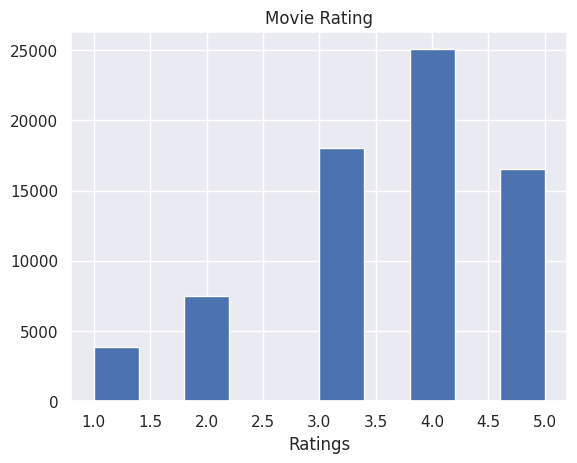

In [106]:
#plotting the histogram for ratings
x = ratings_data["Ratings"]
plt.hist(x)
plt.title("Movie Rating")
plt.xlabel("Ratings")
plt.plot()

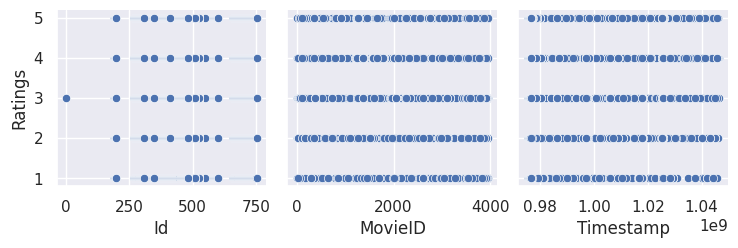

In [107]:
#plotting the pairplot
sns.pairplot(ratings_data, x_vars=['Id', 'MovieID', 'Timestamp'], y_vars='Ratings')
plt.show()

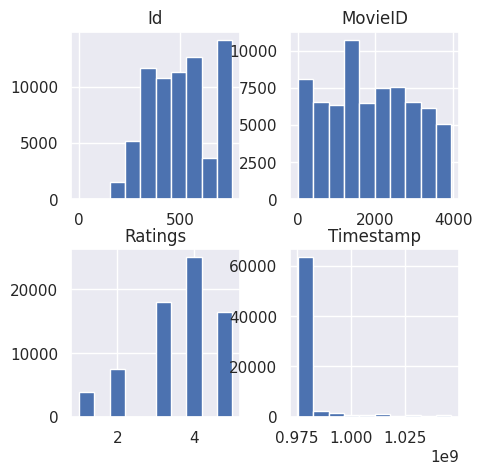

In [108]:
#plotting the histogram
ratings_data.hist(figsize=(5,5))
plt.show()

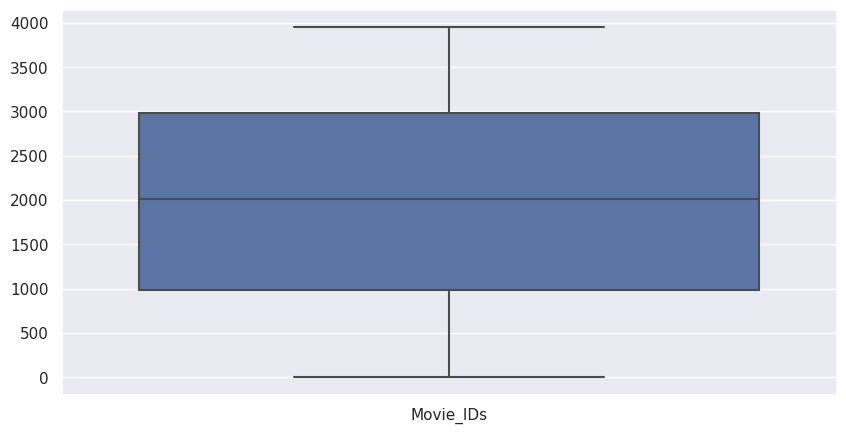

In [109]:
#Plotting the boxplot
plt.figure(figsize=(10,5))
sns.boxplot(movie_data)
plt.show()

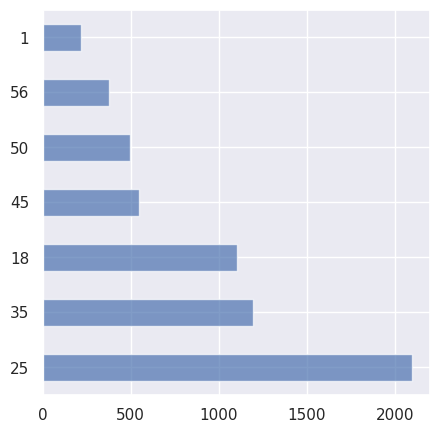

In [110]:
#Visualize user age distribution
users_data['Age'].value_counts().plot(kind='barh',alpha=0.7,figsize=(5,5))
plt.show()

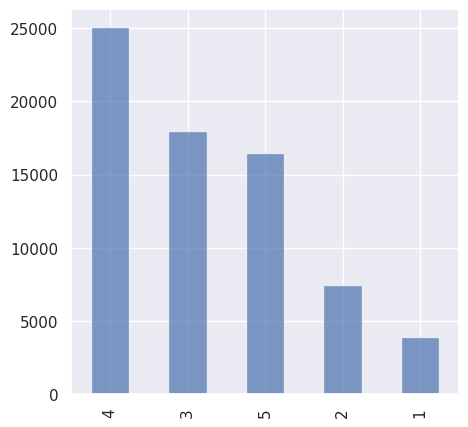

In [111]:
#Visualize overall rating by users
ratings_data['Ratings'].value_counts().plot(kind='bar',alpha=0.7,figsize=(5,5))
plt.show()

In [112]:
x = ratings_data.drop("Ratings", axis=1)
y = ratings_data[['Ratings']]

In [113]:
x.head()

,Id,MovieID,Timestamp
0,660,529,975688859
1,660,62,975694635
2,660,386,975696381
3,660,2000,975698587
4,660,3740,976743652


In [114]:
x.tail()

,Id,MovieID,Timestamp
70871,310,919,976477987
70872,310,2324,976482315
70873,310,3054,976483220
70874,310,1453,976481819
70875,310,780,976478559


In [115]:
x.dtypes

Id           int64
MovieID      int64
Timestamp    int64
dtype: object

In [116]:
x.isnull().sum()

Id           0
MovieID      0
Timestamp    0
dtype: int64

In [117]:
y.head()

,Ratings
0,4
1,3
2,3
3,3
4,4


In [118]:
y.tail()

,Ratings
70871,5
70872,4
70873,1
70874,1
70875,4


In [119]:
y.isnull().sum()

Ratings    0
dtype: int64

In [120]:
y.dtypes

Ratings    int64
dtype: object

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [125]:
x_train.shape #finding the shape of the x_train

(53157, 3)

In [126]:
y_train.shape #finding the shape of the y_train

(53157, 1)

**Model Building**

**Logistic Regression**

In [128]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [129]:
model.score(x_test,y_test)

0.35137423105141374

In [131]:
y_pred=model.predict(x_test)
y_pred

array([4, 4, 4, ..., 4, 4, 4])

In [135]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)

Accuracy: 35.13742310514137
